In [1]:
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
FONTSIZE=20

data = pd.read_csv('../data/claude_generated_tasks_paramsNA_dim3_data100_tasks14000.csv')
#gpt4_generated_tasks_paramsNA_dim3_data100_tasks30.csv')
data = data.query('target == "A" or target == "B"')

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data

Unnamed: 0  Unnamed: 0.1               input target  trial_id  task_id
0                0             0  [0.12, 0.73, 0.41]      A         0      0.0
1                1             1  [0.33, 0.15, 0.62]      A         1      0.0
2                2             2  [0.54, 0.85, 0.23]      B         2      0.0
3                3             3  [0.21, 0.37, 0.17]      A         3      0.0
4                4             4  [0.65, 0.52, 0.09]      B         4      0.0
...            ...           ...                 ...    ...       ...      ...
743748      743748           209  [0.88, 0.12, 0.06]      B        59  11125.0
743749      743749           210  [0.08, 0.92, 0.51]      A        60  11125.0
743750      743750           211  [0.18, 0.82, 0.93]      A        61  11125.0
743751      743751           212  [0.99, 0.01, 0.94]      B        62  11125.0
743752      743752           213  [0.89, 0.11, 0.25]      B        63  11125.0

[743753 rows x 6 columns]

No handles with labels found to put in legend.


mean:  66.8481934208161


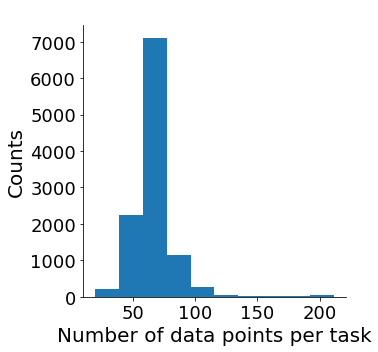

In [3]:
from plots import plot_mean_number_tasks
plot_mean_number_tasks(data)

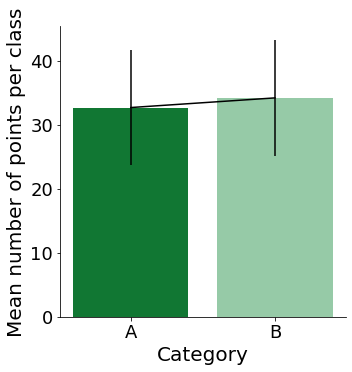

In [4]:
from plots import label_imbalance
label_imbalance(data)

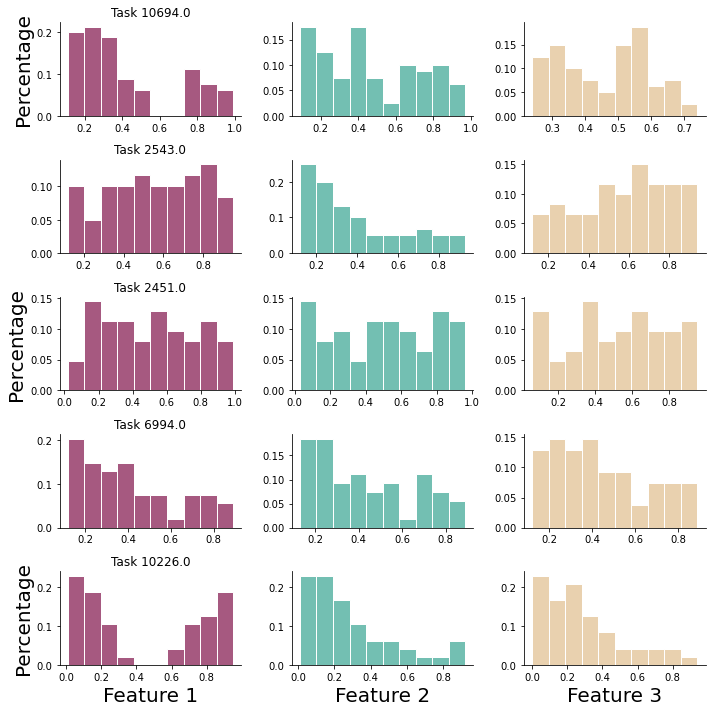

In [4]:
from plots import plot_per_task_features
plot_per_task_features(data)

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


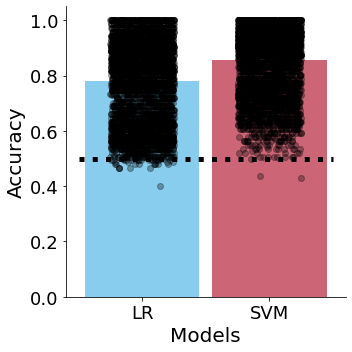

In [4]:
from plots import compare_llm_uniform_data_samples
random=False
min_trials=70
df = data.groupby('task_id').filter(lambda x: len(x) >= min_trials)
df = df[df.trial_id<=min_trials]
compare_llm_uniform_data_samples(df, random)

70


/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:310: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /home/abuild/rpmbuild/BUILD/pytorch-1.13.0/torch/csrc/utils/tensor_new.cpp:230.)
  baseline_model_choices.append(torch.tensor([lr_model_choice, svm_model_choice]))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3

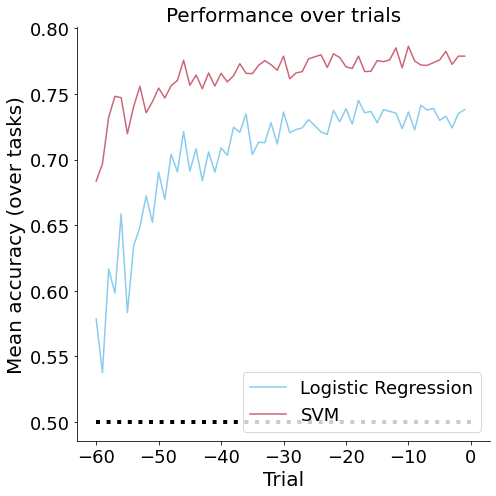

In [3]:
from plots import plot_trial_by_trial_performance
min_trials=50
burn_in=10
plot_trials = min_trials-burn_in
df = data.groupby('task_id').filter(lambda x: len(x) >= min_trials)
plot_trial_by_trial_performance(df, burn_in, plot_trials, min_trials)

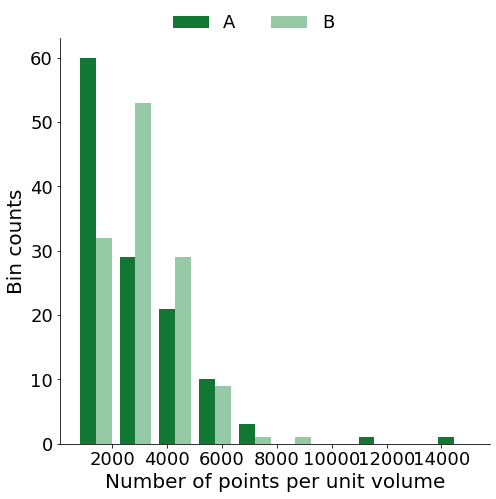

In [12]:
from plots import plot_histogram_binned_data
plot_histogram_binned_data(data, 5)

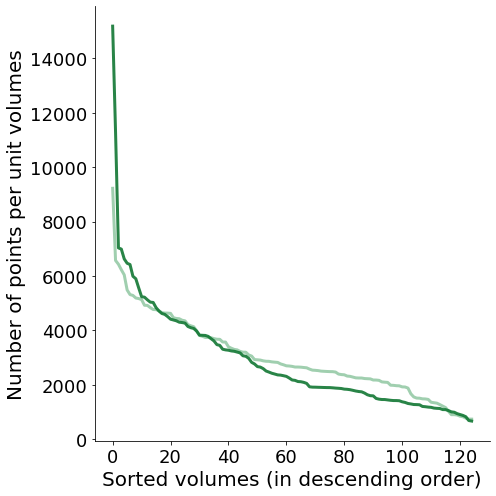

In [22]:
from plots import plot_sorted_volumes
plot_sorted_volumes(data, 5, min_value=0, max_value=1)

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization fai

Optimization terminated successfully.
         Current function value: 0.000062
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
         Current function value: 0.091999
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.094951
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.424535
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.252072
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.615239
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.176263
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.129393
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.103095
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.179553
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.183409
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.272192
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.206851
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.605189
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.546163
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.253693
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.182509
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.148308
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.140223
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.307802
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.447838
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.207170
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.210875
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.693056
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
         Current function value: 0.663973
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.037727
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.037260
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.061678
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.059157
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.621118
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.515324
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
         Current function value: 0.033509
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.666523
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.692561
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.684436
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
         Current function value: 0.064362
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.055767
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.126479
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.107400
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.686670
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.661174
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.303276
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.260552
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.682493
         Iterations: 23
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.642445
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.646570
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.600768
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.561526
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.362221
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.067290
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.000066
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.185556
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.182703
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.463836
         Iterations: 31
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.457502
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.379245
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.664976
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.614556
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000059
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.229136
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.222179
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.057193
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.254348
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.241499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.619478
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.587519
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.086990
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.074834
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.101297
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.102923
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.681671
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.635565
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.606140
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.588575
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.535208
         Iterations: 28
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.688166
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.660520
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.262082
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.248619
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.575288
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.349459
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.633882
         Iterations: 26
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.001047
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.043007
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.043016
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.649765
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.625977
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.503453
         Iterations: 25
         Function evaluations: 27
         Gradient evalua

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.067552
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.659115
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.623407
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.673902
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.613462
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.307942
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.249408
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.687115
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.440299
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.346424
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.286413
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.335569
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.330830
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.269978
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.673105
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.542923
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.373003
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000030
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000008
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.489792
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.407281
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.117152
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.508831
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.442081
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.671926
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.616091
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.662413
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.613771
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000111
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000049
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.222908
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.290647
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.285251
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.670282
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.573032
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.223829
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.302297
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.267907
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.103654
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.098818
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.303678
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.244773
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.433797
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.230219
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.192246
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.112310
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.116080
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.045414
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.044345
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.554246
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.548389
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.244721
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.243402
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.017449
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000513
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.504442
         Iterations: 29
         Function evaluations: 30
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.217390
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.112302
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.475966
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.467058
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.691729
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.661965
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.085605
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.206660
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.183926
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.258668
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.237881
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.281473
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.267229
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.658502
         Iterations: 23
         Function evaluations: 25
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.132994
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.119033
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.504250
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.135640
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.271752
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.223918
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.257933
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.210950
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.144113
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.268196
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.126427
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.625854
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.557593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.323622
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.681643
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.658366
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.071702
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.074625
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.517393
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.491185
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.674159
         Iterations: 26
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.259196
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.254676
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.257547
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.235392
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.621354
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.286200
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.343946
         Iterations: 33
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.680282
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.661716
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.343346
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.331285
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.575794
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.332231
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690740
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.179100
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.177085
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.407966
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.312210
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.685880
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.683536
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.571641
         Iterations: 25
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.128221
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.462714
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.440264
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.202613
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.189695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.255366
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.117389
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.275976
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.269858
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.175523
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.167635
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.208778
         Iterations: 34
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.358184
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.319129
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.250791
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.016842
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000310
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.575225
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.477408
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.001109
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000107
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.206122
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.257612
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.195447
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.282541
         Iterations: 31
         Function evaluations: 32
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.679763
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.667814
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.245566
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.245499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.258576
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.362847
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.354421
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.672112
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.592043
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.277335
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.261208
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py


         Gradient evaluations: 27
         Current function value: 0.458417
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.191926
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.183421
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.044795
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000186
         Iterations: 35
         Function e

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:37

Optimization terminated successfully.
         Current function value: 0.306693
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.152956
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.686600
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.628606
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.399992
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.151025
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.314435
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

         Current function value: 0.088791
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.078487
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.213637
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.096087
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.671015
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.622771
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 17
         Function evaluations: 19
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.582555
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.099057
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.095476
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000046
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.688646
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.674839
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.661991
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.394823
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.565033
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.549715
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.210360
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.174083
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.307146
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.215599
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.177486
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.679865
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.595147
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.129121
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.087631
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.578401
         Iterations: 28
         Function evaluations: 29
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.204186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.213503
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.175787
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000016
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000016
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.469638
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.359192
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.667478
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.545582
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.617143
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.562872
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.689199
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.627105
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.001817
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.112939
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.105036
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.293703
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.199957
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000011
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.617954
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.514726
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000878
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.252867
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.240286
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.251193
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.156529
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.379980
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.219827
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.001994
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.006126
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688205
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.536707
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.648074
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.690357
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.687613
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.619164
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.558670
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000006
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.371184
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.175120
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.151529
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000015
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.106083
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.071514
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.629197
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.516859
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.186640
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.181759
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677737
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.647081
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.380016
         Iterations: 28
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.000033
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.013845
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.533127
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.487670
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.238103
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.105154
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.267268
         Iterations: 33
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.327731
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.280581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.692080
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.594675
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000645
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.023162
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.368808
         Iterations: 28
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.200202
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.625557
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.593208
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.185616
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.166215
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.494817
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.600924
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.535234
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.044542
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.040341
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.478215
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.390099
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.517546
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.372955
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.333872
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.651904
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.593860
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.295891
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.148390
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.399298
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.313080
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 17
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000019
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimi

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

         Current function value: 0.487824
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.463056
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.373604
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.100784
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.092775
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.480417
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.346554
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.636520
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.154038
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.130785
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.111681
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.101329
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.269250
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.250113
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.659510
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.567726
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.663200
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.632570
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.331507
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.272163
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.445147
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.657638
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.616768
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.607912
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.529974
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.232577
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.384895
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.319827
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.266286
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.253365
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.341982
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.316768
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.615850
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.234319
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.581388
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.542033
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.606333
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.526056
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.206654
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.213606
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.293335
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.685996
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.681154
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.007828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.003103
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.669033
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.636469
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

         Current function value: 0.002951
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.052342
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000432
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.085098
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.085051
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.686385
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.651403
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.311008
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.190244
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.168566
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.460237
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.218880
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.532361
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.082616
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.169998
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.141841
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.660361
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.641176
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.059992
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

         Current function value: 0.233442
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.115900
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.067967
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.537552
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.459163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.569000
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.559448
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.126352
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.474866
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.245262
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.119252
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.121840
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.666540
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.620303
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.188757
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.343866
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.179737
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.142235
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.062189
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.658995
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.583373
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.257456
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.309537
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.291301
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.452940
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.365522
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.537793
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.331193
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.584084
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.138095
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.104154
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.439796
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.168238
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:37

         Current function value: 0.601124
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.549673
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.291307
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.671810
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.621130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000009
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no b

         Current function value: 0.000019
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.209717
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.168908
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000011
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.677466
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.658471
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWa

         Current function value: 0.007007
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.692394
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.507785
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.364957
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.310322
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.170047
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.139116
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.538667
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.483923
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.495315
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.418558
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.433018
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.401941
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.676687
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.627989
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.553835
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.579496
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.456576
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Cur

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.062653
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.042211
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.119476
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.121180
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.670822
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.645417
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.262726
         Iterations: 31
         Function evaluations: 33
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.612922
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.589046
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.431121
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
         Current function value: 0.002599
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.681683
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.679849
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.074774
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py


         Current function value: 0.169541
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.561162
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.177366
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.348723
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.200455
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.681190
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.437165
         Iterations: 35
         Functi

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.449589
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.445988
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.324173
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.046631
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.049630
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.104462
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.098741
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.456440
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.634908
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.621417
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.434002
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.417754
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.640714
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.615072
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.525936
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.232825
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.205991
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689879
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.675811
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.177543
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.131049
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.554980
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.488486
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.135629
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.089229
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.504499
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.329124
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.291171
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.273680
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.433081
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.303132
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.681785
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.236560
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.292562
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.246771
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.348780
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.340272
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.150772
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.121804
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.671850
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.274314
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.278541
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.677956
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.631748
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.215220
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.163929
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.070894
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.046843
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.668428
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.654616
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.452286
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.386317
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.623882
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.556933
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.527807
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.461316
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.267970
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.218910
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000033
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.346874
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.103360
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.678900
         Iterations: 27
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.429642
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000545
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.000343
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000078
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000015
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.383206
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.335201
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.230270
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.102746
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.061097
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.520319
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.517875
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.604020
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.575447
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.116277
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.115196
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.032398
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.010814
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000744
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.092775
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r


Optimization terminated successfully.
         Current function value: 0.419433
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.328938
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000027
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.635959
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.000491
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
     

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.036800
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.139467
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.112033
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.147540
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.121885
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.170480
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.151725
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.534077
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.275841
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.004901
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.660623
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.571419
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.135826
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.131357
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.436634
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.691664
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.684972
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.653326
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.638293
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.350092
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.189466
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 22
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.674640
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.641047
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.353582
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.256508
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.548380
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.506646
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.337066
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.207418
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.207686
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000465
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000488
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.603135
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.546574
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.124346
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.129379
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.657834
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.620880
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.660411
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.632614
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.435468
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.397182
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.257829
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.033670
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.002324
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.064782
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.067316
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.151457
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.121397
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.533747
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.084821
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.083325
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.091756
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.088701
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.243437
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.196845
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.077178
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.321448
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.244542
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.438771
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.401716
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.262161
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.244661
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.688492
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.495580
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.132415
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.121239
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.239647
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.240458
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.481318
         Iterations: 26
         Function evaluations: 28
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.147950
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.128836
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.608787
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.455800
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.011482
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.011551
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677859
         Iterations: 23
         Function evaluations: 25
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.631956
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.490845
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000017
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimi

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.657588
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.622445
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.448129
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.388498
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.464897
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.466069
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.175081
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/pyth

Optimization terminated successfully.
         Current function value: 0.252303
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.174797
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.394961
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.316871
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.278355
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.195921
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000011
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.131400
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.117333
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.258646
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.236161
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.138066
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.122789
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.583388
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.065683
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.658115
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.626222
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000020
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.131070
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.024148
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.289465
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.213992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.190001
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.155898
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.501892
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.135334
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.307902
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.244203
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.616662
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.534404
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.038511
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.523750
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.466830
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.020239
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.025417
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.678069
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.591922
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.668097
         Iterations: 22
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.629054
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.601463
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.315636
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.100375
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.691244
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.661305
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677683
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.382516
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.610252
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.570792
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.667146
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.649327
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:37

Optimization terminated successfully.
         Current function value: 0.594926
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.584101
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.367366
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.303913
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.616901
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.446639
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.663193
         Iterations: 25
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.356750
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.303148
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.692525
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.689584
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.545592
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.301611
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.691143
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInv

Optimization terminated successfully.
         Current function value: 0.423420
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.310867
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000020
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.575800
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.506829
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.301434
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.592059
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.546760
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.682467
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.675515
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.526170
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.165460
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.053741
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000101
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.164967
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.163747
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.409104
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.299216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.125579
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.097746
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.353843
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.293843
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.503661
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.208924
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.384655
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.305841
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.177101
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.162402
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.236779
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.235092
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:37

         Current function value: 0.680695
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.198264
         Iterations: 31
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.193439
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.343510
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.279283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.660508
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.645753
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWa

         Current function value: 0.419319
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.267261
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.238056
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.692498
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.662964
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.051665
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.060536
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.382501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.457290
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.405367
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.691965
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.682634
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.668858
         Iterations: 26
         Function evaluations: 27
         Gradient evalua

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.247488
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.215438
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.623341
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.503889
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.649847
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.608123
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.362574
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.284247
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.283580
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.065608
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000032
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.661718
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.622905
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.334396
         Iterations: 33
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.635080
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.618361
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.326437
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.298689
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.573120
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.298591
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.637479
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.125091
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.121191
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.099836
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.095210
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.572798
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.513671
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.632459
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.249024
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.250386
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.242090
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.239871
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.551302
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.506456
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



         Current function value: 0.645946
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.669632
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.630529
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.435510
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.394960
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.145769
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.130226
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.014897
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000348
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.214516
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.139593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.000657
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.614434
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.535358
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.182847
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.149206
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.558468
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.495283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.304461
         Iterations: 34
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:37

Optimization terminated successfully.
         Current function value: 0.000017
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.383823
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.285057
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.684981
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.615649
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.172634
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.128124
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.424814
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.137141
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.115074
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.658174
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.614322
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.042341
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.039820
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.632619
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.438663
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000075
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.687669
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.599893
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.365105
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.689058
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.582289
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.640211
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.334667
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.223504
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.216098
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000028
         Iterations: 34
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.181614
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.144141
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.661973
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.592801
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.215464
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.118573
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.662383
         Iterations: 24
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.378538
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.353961
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.670973
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.559211
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.198769
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.195660
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.536479
         Iterations: 27
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.684395
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.683507
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.422144
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.158831
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.169843
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.158461
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.449475
         Iterations: 30
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.597086
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.528152
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.690952
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.644044
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.665398
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.497280
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.118143
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.308794
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.292024
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688749
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.584295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.589013
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.463913
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.139770
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.104887
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.349065
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.278029
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.655951
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.653280
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.677603
         Iterations: 25
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.481010
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.246280
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.156661
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.151925
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.681528
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.646415
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.665398
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.119238
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.674057
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.628430
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690485
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.574313
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.589931
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.579261
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.621429
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.584151
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.575300
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.500956
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000037
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000019
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000029
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000021
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.682214
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.673345
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimi

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.672157
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.526209
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.199568
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.154190
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.637509
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.614355
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.666565
         Iterations: 27
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.033728
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.029194
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.051380
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.046183
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.664783
         Iterations: 29
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:37

         Current function value: 0.173649
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.514238
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.256520
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.210212
         Iterations: 33
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.196060
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.212879
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.191719
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.528968
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.385704
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.613382
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.444242
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.409438
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.021801
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.296885
         Iterations: 30
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.405004
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.081826
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.016691
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.180259
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.179140
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.209628
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.191635
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.193267
         Iterations:

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.638506
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.668301
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.489941
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.112392
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.098351
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.118527
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.112700
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.185571
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.691774
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.675012
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.584574
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.558610
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.687618
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.664649
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.339856
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.320705
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.372541
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.295276
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.666732
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.638131
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.599202
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688291
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.676600
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
      

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.141346
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.122125
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000703
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000164
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.000719
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.616402
         Iterations: 25
         Function evaluations: 27
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWa

         Current function value: 0.334457
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690328
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.676921
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.604556
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.577685
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.420430
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.320226
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.437562
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.396453
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.151231
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.666177
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.593606
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.362967
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.341510
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.687300
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.650009
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.517905
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.077050
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.065874
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.636095
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.624862
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000024
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 29
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInv

         Current function value: 0.139196
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.136865
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.659386
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.564523
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.435011
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.347430
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.115908
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.412186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.624340
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.610174
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.640114
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.557890
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.014414
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.206818
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.194108
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.608447
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.536557
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.670041
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.609709
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.023983
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000209
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.692366
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
         Current function value: 0.691771
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.639564
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.516709
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.083851
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.265855
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.215373
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.257169
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.248961
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.180193
         Iterations: 33
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.143022
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.198019
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py


         Current function value: 0.609678
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.364950
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.304910
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.205020
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.204501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.441704
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.345888
         Iterations: 35
         Function evaluations: 36
         Gradient e

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.203075
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.638367
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.587513
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.535521
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.356296
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.174588
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.144580
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.228601
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.214065
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.381359
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.323815
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.432017
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.224345
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.214208
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.463649
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.361836
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.032472
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.006005
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.150467
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.679575
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.667033
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.681489
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.657747
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.510571
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.466725
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.089342
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.662159
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.636680
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.039654
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.039645
         Iterations: 28
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.160584
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.147859
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.196467
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.187201
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.342540
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.311517
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.655646
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.559444
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.166191
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.496569
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.368913
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.147854
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.675214
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.643928
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.636517
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.602610
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.677759
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677425
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.661409
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.494327
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.360539
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

         Current function value: 0.194852
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.169875
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.447748
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.447462
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.679147
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.644781
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.633625
         Iterations: 28
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInv

Optimization terminated successfully.
         Current function value: 0.000065
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.074593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.072104
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.541695
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.210732
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.662898
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py


         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.051253
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000015
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.669937
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.577882
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.435578
         Iterations: 32
         Function e

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.338433
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.177441
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.311366
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.295657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.473412
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.401008
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.301019
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.031118
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.504636
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.464260
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.258910
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.259715
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.035391
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.041205
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.635390
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.401365
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.257329
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.203251
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.053459
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.045817
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.645010
         Iterations: 26
         Function evaluations: 28
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.408521
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.474830
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.237280
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.621596
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.585823
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.329138
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.280457
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.079415
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.067556
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.598537
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.514254
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690564
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.549358
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.359455
         Iterations: 30
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.558580
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.236485
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.213525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.634362
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.570928
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.202280
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.131215
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.051690
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.019752
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
      

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.656842
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.350536
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.337313
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.156876
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.131067
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.242989
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.233869
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.538940
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.672968
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.463232
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.420310
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.404737
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.110135
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.053293
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.623680
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.599974
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689085
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.661361
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.421300
         Iterations: 30
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.176332
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.288356
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.254899
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000077
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.689422
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.634845
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.398828
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.285523
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.269578
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.242674
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.214153
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.201340
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.599096
         Iterations: 28
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.660399
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.635634
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.296871
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.283489
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.006317
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000557
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000033
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

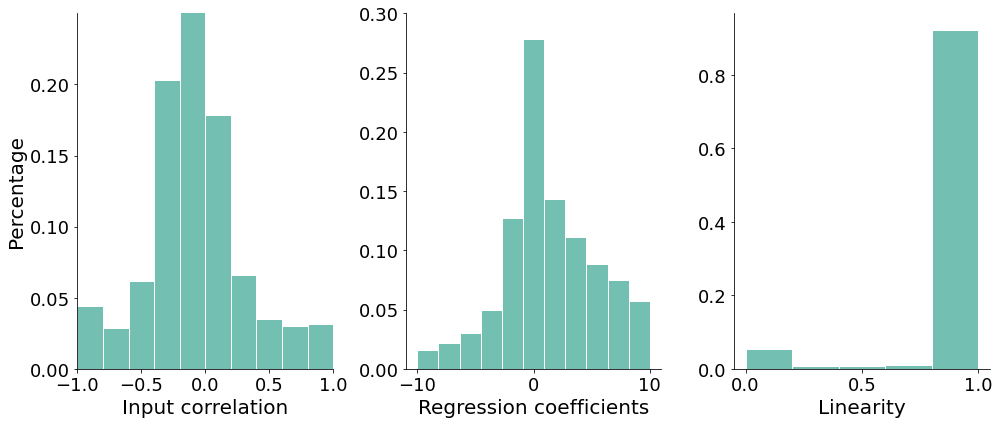

In [8]:
from plots import plot_data_stats
plot_data_stats(data)

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization fai

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.092666
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.076296
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.082151
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.081725
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.169121
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.678664
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.655092
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.660022
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

         Current function value: 0.270588
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.682314
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.633796
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.653729
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.609903
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.301759
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.257755
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.126667
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.104938
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.686135
         Iterations: 34
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.681860
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.689292
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.685772
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.171120
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.310734
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.165043
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.162873
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.352988
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.300135
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.304972
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.284208
         I

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.492519
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.676998
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.668112
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.167555
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.165773
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.294110
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.284150
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.404719
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.365559
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.646605
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.592907
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimizati

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:36

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.033175
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.027968
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.299907
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.222177
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000005
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.452667
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.436269
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.672947
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.613505
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.635600
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.550259
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.690753
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.074945
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.038512
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.279637
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.267483
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.685807
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.624919
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 30
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.675938
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.356410
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.220415
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.667136
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.521853
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.641252
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.628329
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.327117
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.240105
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.222803
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.199810
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689807
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.668037
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.654358
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.091026
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.087828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.235378
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.200313
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.318926
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.193483
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.201435
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.309671
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.291537
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.641114
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.497347
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/pyth

         Current function value: 0.077544
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.053277
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.671099
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.495744
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.300224
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.231746
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.106293
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.321844
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.306654
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.393763
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.348995
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.186593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.148347
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.141386
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.684445
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.667371
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.177484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.177798
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.286740
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.264525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688134
         Iterations: 20
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.122142
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.118155
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677114
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.668193
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.674572
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
         Current function value: 0.592206
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.454951
         Iterations: 35
         Function evaluations: 38
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.051581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.045193
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.470543
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.460565
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.366248
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.095357
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.238319
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.617384
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.476138
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.635179
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.524265
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.660909
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.553036
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.632344
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.494194
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.212875
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.197748
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689871
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.674051
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.692684
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.673363
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.669482
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.315067
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.248764
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.651775
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.615548
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.095142
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.092880
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.051911
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000941
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.003879
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.692682
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.691344
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.450985
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.427353
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.683030
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.630485
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.336350
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.226883
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.036169
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.001763
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.577448
         Iterations: 28
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.541413
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.641158
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.632949
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.617678
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.526657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.612880
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.595621
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.102763
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.668340
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.633499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.640146
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.589852
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000026
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 34
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.573687
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.691396
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.685120
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.170045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.162608
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.291630
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.213189
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.057196
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.124605
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.116030
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.589798
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.575400
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.482912
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.450214
         I

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.396731
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.380927
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.248703
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.239844
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.114968
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.116649
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.261610
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.653059
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.646814
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.251031
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.230876
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.685402
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.679247
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.236264
         Iterations: 33
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.613908
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.559395
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.459314
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:36

Optimization terminated successfully.
         Current function value: 0.666111
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.616299
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.641029
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.536028
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.666898
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.646065
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.468771
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.586231
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.522251
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.340005
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.564754
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.549695
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.207042
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.043965
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.677602
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.623613
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.117094
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.054409
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.683598
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.650813
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689231
         Iterations: 23
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.648517
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.381217
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.172376
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.634950
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.560579
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.494609
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.456817
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.652118
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.607906
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.643335
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.554047
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000010
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 30
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.238458
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.228187
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.679549
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.628905
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.263924
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.201929
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.315849
         Iterations: 33
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.678904
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.669305
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.669540
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.634962
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.601459
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.378640
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.140407
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.146861
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810:

         Current function value: 0.692154
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.327396
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.289259
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.058592
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.043864
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.118147
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.113903
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.560240
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.427325
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.417309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.411726
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.296621
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.588465
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.563936
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.492105
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.255537
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.238469
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.537407
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.165640
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.683500
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.655692
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.648737
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.442973
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.271007
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000025
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.000029
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.352620
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.341126
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.047342
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000044
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.006440
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.044854
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization fai

         Current function value: 0.362159
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.669343
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.658330
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.506928
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.401762
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.655433
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.487381
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.126677
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.139816
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.632913
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.442352
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.399431
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.265860
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.676596
         Iterations: 29
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.082486
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.426914
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.364190
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.329154
         Iterations: 28
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.307598
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000007
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.680867
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.655596
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.669169
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.587884
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.126198
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.034142
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.011486
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677559
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.674369
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.634664
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.066232
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.064081
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.068947
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:36

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.321291
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.311870
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.644971
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.622768
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688460
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.644492
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.681455
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.638736
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.687897
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.670427
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000016
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
      

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.685422
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.481617
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.190423
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.162698
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
      

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.130383
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.122763
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.620723
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.435797
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.670866
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.563099
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.418837
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.041997
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.691270
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.685314
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000021
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.654477
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.618257
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.143710
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.105686
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.352184
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.286576
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.145203
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.147255
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.138058
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.176220
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.146055
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.127677
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.220291
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.214570
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.081056
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.070270
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.000066
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000018
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.210530
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.184224
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.680779
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.628736
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.669226
         Iterations: 23
         Function evaluations: 25
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.365054
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.348723
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.227321
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.073732
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.692325
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.500687
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.444011
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.331899
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.286762
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.298250
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.150529
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.128150
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.673305
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.631658
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.553928
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.440002
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.562526
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.540532
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.127111
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.093188
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.298407
         Iterations: 31
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.144495
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.115067
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.162400
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.144899
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.227077
         Iterations: 34
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.124627
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.075976
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.657894
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.586975
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.022690
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.041075
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.141683
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.677043
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.621586
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.412701
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.239386
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.585070
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.092148
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.087163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000008
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

Optimization terminated successfully.
         Current function value: 0.600796
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.582671
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.611092
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.427580
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.656704
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.472383
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.218201
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.222467
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690088
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.652232
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.187828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.168999
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.162261
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.153516
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.301018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689234
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.662594
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.010499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000635
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.667267
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.636735
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.619136
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.584184
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677138
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.664250
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.350422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.197127
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.684181
         Iterations: 24
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.668872
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.658367
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.481153
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.133776
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.314540
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.289173
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.593822
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.267939
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690315
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.684499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.553667
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.405122
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.068300
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.053598
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.175401
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.173611
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.691801
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.666404
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.163442
         Iterations: 35
         Functi

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.600675
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.680242
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.594078
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.613431
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.521876
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.655877
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.610098
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.266057
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.166569
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.226563
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.226461
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000036
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

         Current function value: 0.067146
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.250438
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.210453
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.496964
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.243696
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.229293
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.174843
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.000216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.055099
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.050260
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.682764
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.630526
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.112069
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.111655
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.223304
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.170964
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690661
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.661380
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.632125
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.584622
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.590016
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

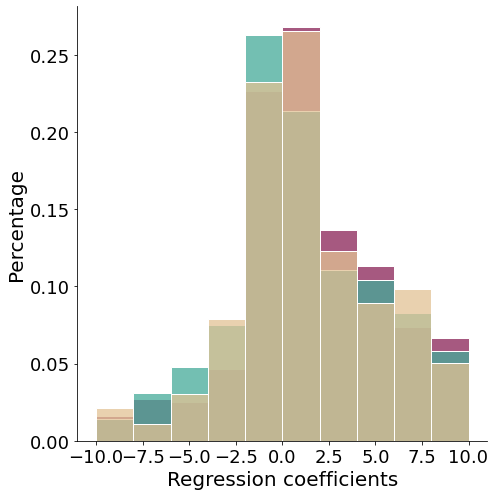

In [10]:
from plots import plot_cue_validity
plot_cue_validity(data)

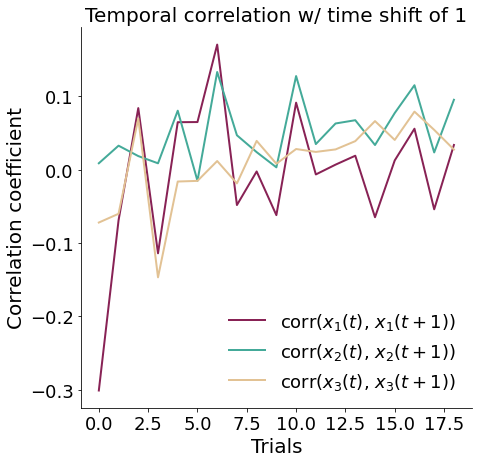

In [17]:
from plots import plot_correlation_features
plot_correlation_features(data, max_input_length=211, time_shift=1)

/raven/u/ajagadish/vanilla-llama/categorisation/plots.py:264: RuntimeWarning: Mean of empty slice
  dists, probs = np.nanmean(distances,0), np.nanmean(probabilities, 0)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


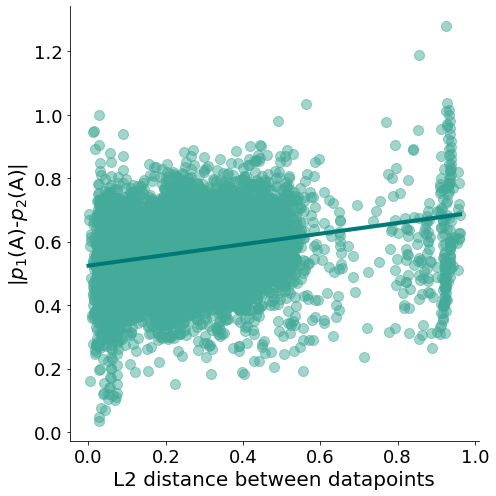

In [18]:
from plots import plot_probability_same_class_versus_distance
plot_probability_same_class_versus_distance(data)